In [6]:
%load_ext autoreload
%autoreload 1
%matplotlib inline
import os
import sys
import numpy as np
import pandas as pd

root_dir = os.path.join(os.getcwd(),os.pardir,os.pardir)
src_dir = os.path.join(os.getcwd(), os.pardir,os.pardir, 'src')
if src_dir not in sys.path: sys.path.append(src_dir)

from data.preprocessing import load_file,filter_by_season,display_df,get_scaled_series
from features import build_features,tools
from visualization import visualize as viz, cluster_analysis as va
import settings

import models.classifierModel
# %aimport data.preprocessing
# %aimport features.build_features
# %aimport visualization.visualize
# %aimport visualization.cluster_analysis

row_headers=settings.row_headers

season = "Autumn"
version = 1
filename = "nb_p2_clusters_%s"%(season)
# filename = "p2_clusters_Autumn_v99"


#Load files
raw_df = load_file("p2_raw").set_index(row_headers)
series_df =load_file("p2_series",type_="P",version = 1).set_index(row_headers)
clean_df = load_file("p2_clean",type_="P",version = 1).set_index(row_headers)

#Filter and normalize
sclean_df = filter_by_season(clean_df,season)
zclean_df,_ =  get_scaled_series(sclean_df)

#clustering result
cluster_df = load_file(filename,index=row_headers,type_="M",version=3)
cluster_centroid = cluster_df[["Cluster","Centroid"]].drop_duplicates().set_index(["Cluster"]).to_dict()["Centroid"]

plot_df = clean_df.join(cluster_df,how="inner")

#cleaned features
features_df = load_file('clf_features',type_="P",index = row_headers)


assert features_df is not  None
features_df.Ldate = features_df.Ldate.apply(lambda x:str(x))
numeric = (list(features_df.columns.to_series().groupby(features_df.dtypes).groups[np.dtype('float64')]))
features_list = list(features_df.columns) + ["Cluster"]
df = features_df.join(cluster_df,how="inner")[features_list]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


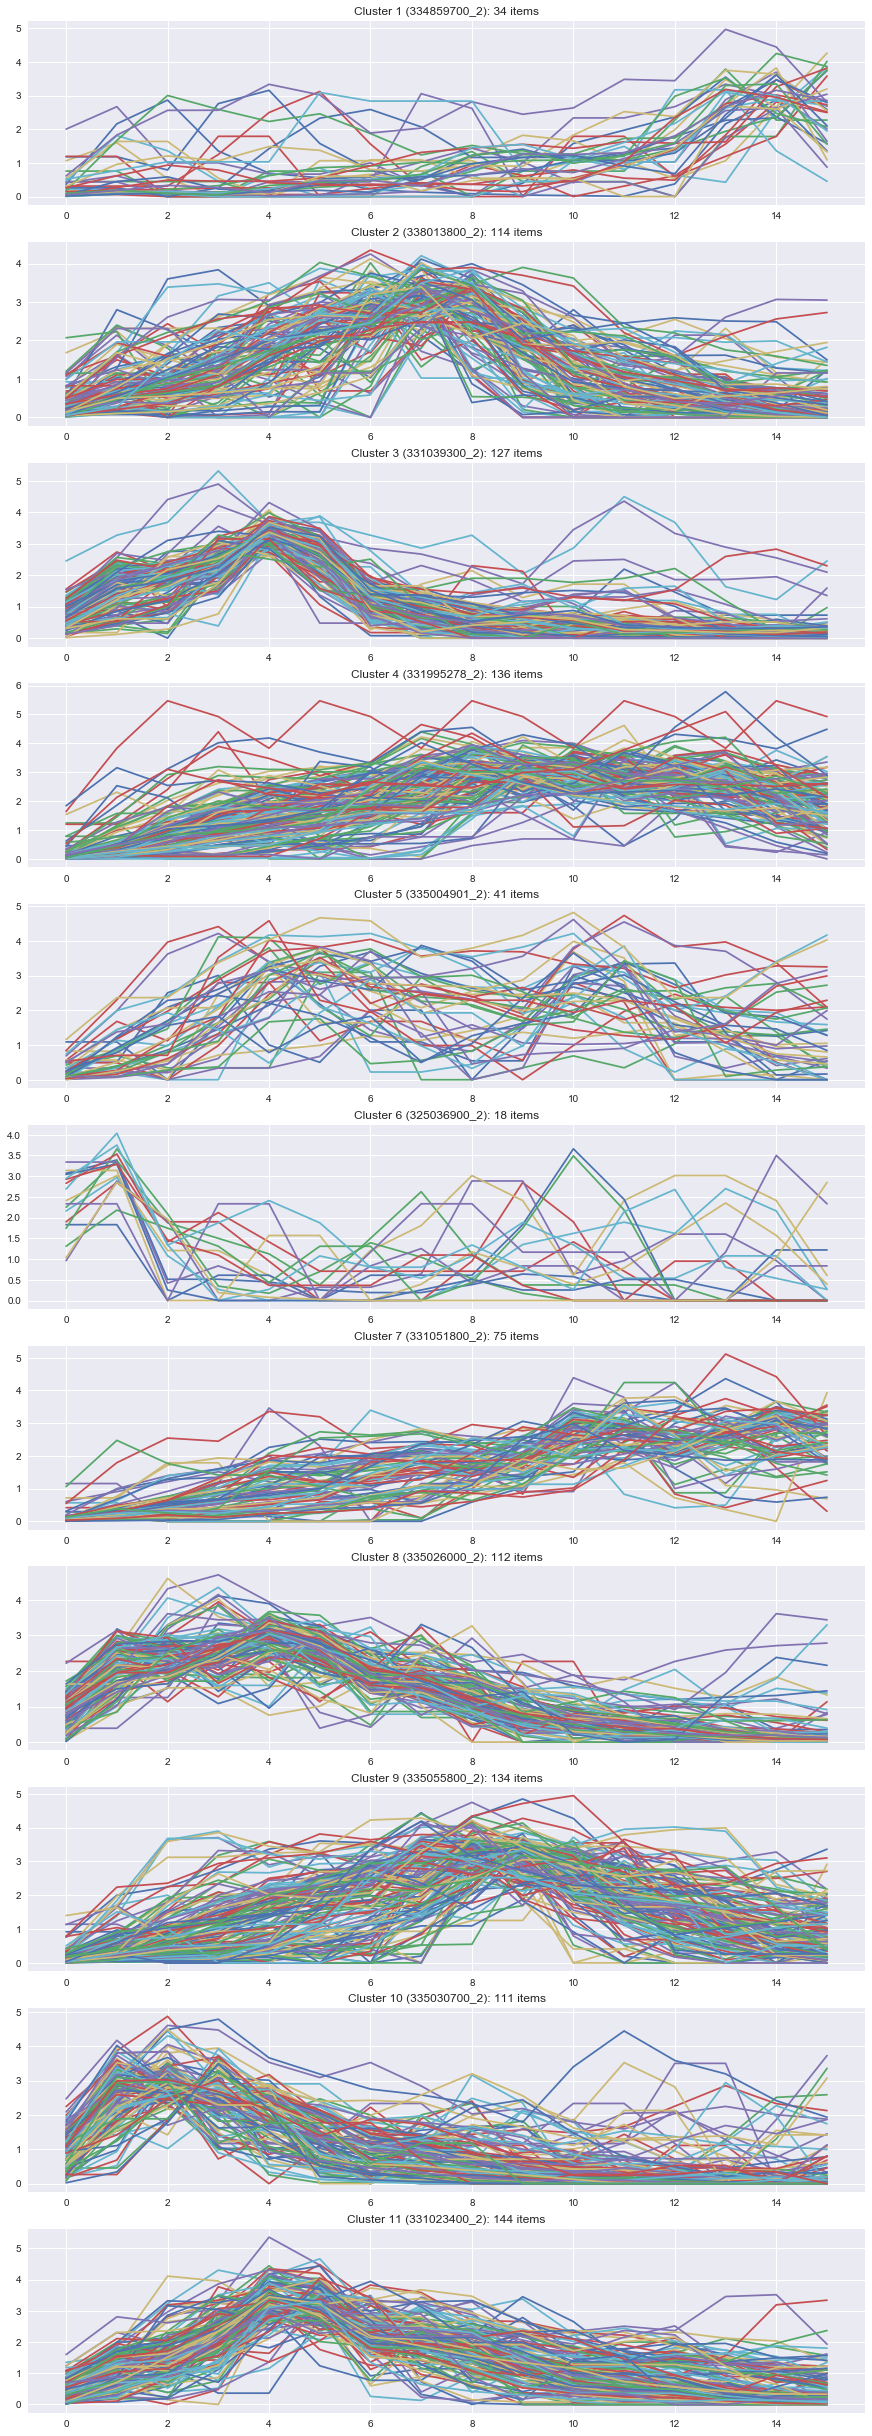

In [10]:
viz.cluster_plot(plot_df,centroid_only = False)

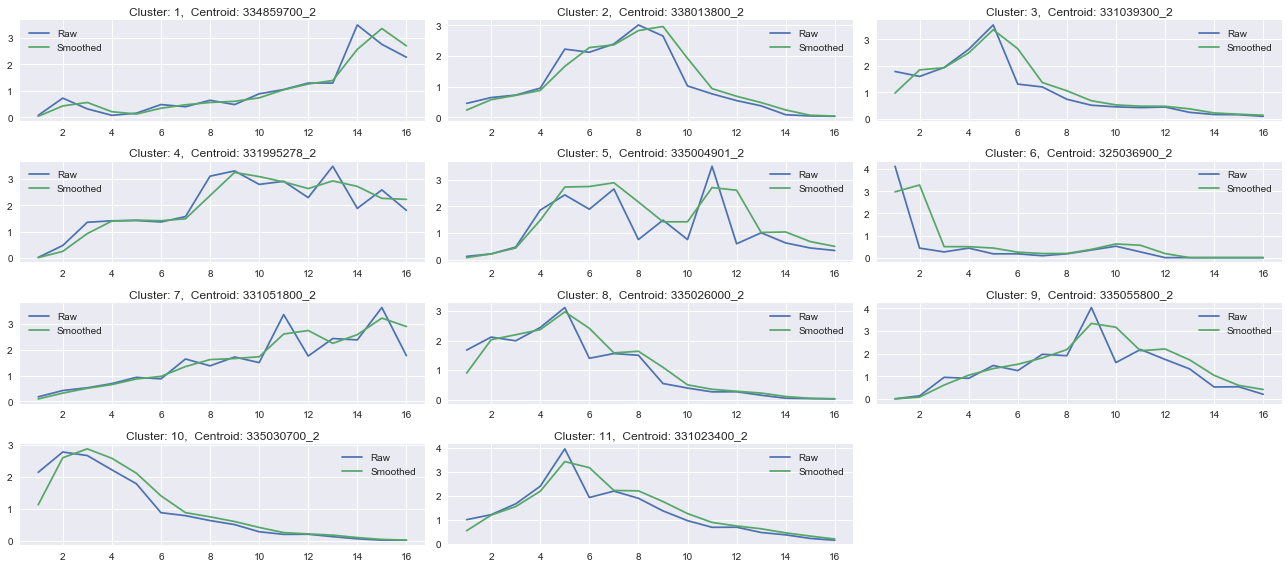

In [7]:
va.centroid_grid_plot(raw_df,clean_df,cluster_df)

In [8]:
from models.predict_model_classifier import predict_cluster, load_classifier
%aimport models.predict_model_classifier


classifier = load_classifier()
y_pred, y_pred_proba = predict_cluster(data)

ImportError: cannot import name 'predict_cluster'

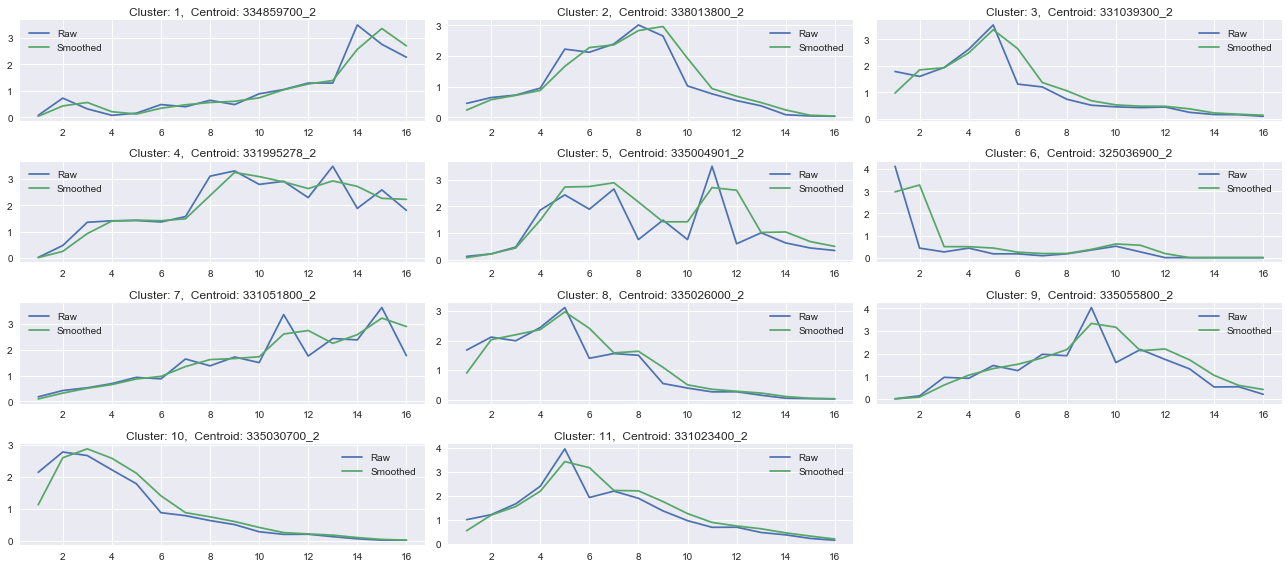

In [9]:
va.centroid_grid_plot(raw_df,clean_df,cluster_df)

In [11]:
centroids = list(set(cluster_df.Centroid))

counts = cluster_df.groupby(["Centroid"]).count()[["Cluster"]].values


raw_profiles = series_df.loc[centroids].apply(lambda x:x/x.std(),axis=1).sort_index()
raw_profiles["Count"] = counts

smoothed_profiles = clean_df.loc[centroids].apply(lambda x:x/x.std(),axis=1).sort_index()
smoothed_profiles["Count"] = counts

# save_file(raw_profiles,"profiles_%s_raw"%season,type_="RP",index=True)
# save_file(smoothed_profiles,"profiles_%s_smoothed"%season,type_="RP",index=True)

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def spin_rect():
    pass


def draw_rect(left, bottom, w, h):
    # build a rectangle in axes coords
    right = left + w
    top = bottom + h

    # axes coordinates are 0,0 is bottom left and 1,1 is upper right
    p = patches.Rectangle(
        (left, bottom), w, h,
        fill=False, clip_on=False
        )
    ax.add_patch(p);

fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

draw_rect(.25,.25,5,5);